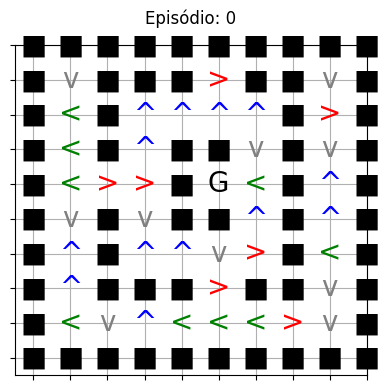

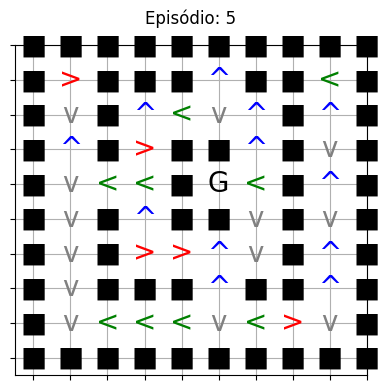

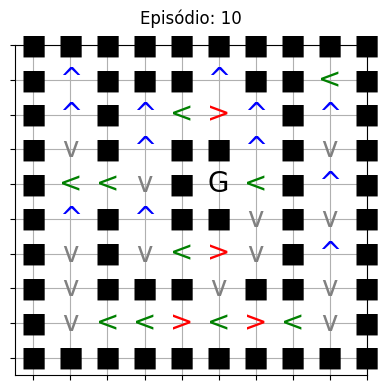

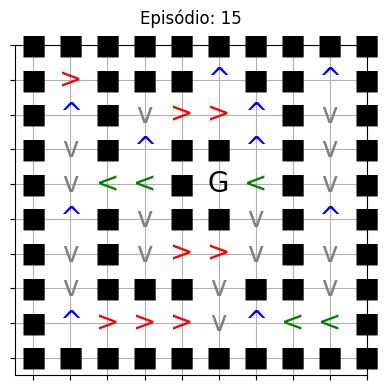

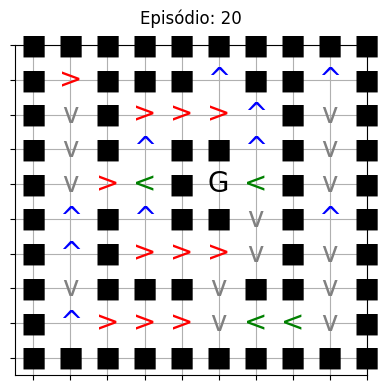

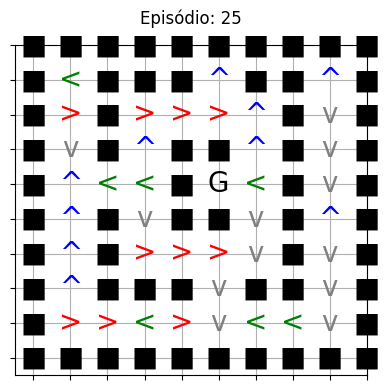

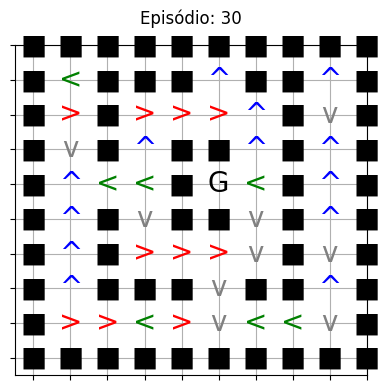

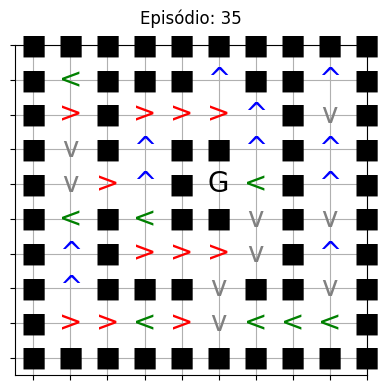

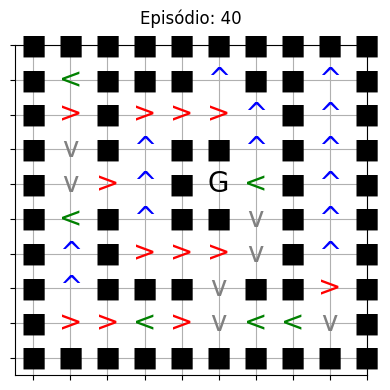

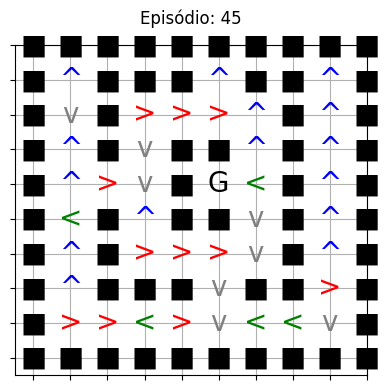


Tabela Q final:
[[ 4.57430956e-01  2.68023907e-01  8.82054599e-02  1.19571106e-01]
 [ 8.88845088e-01  6.66925231e-01  6.02607722e-01  6.55854529e-01]
 [ 8.22319333e-02  3.71691271e-01  4.89338010e-01  7.82877191e-01]
 [ 8.67840648e-01  3.46872977e-01  5.01109015e-01  5.26367610e-01]
 [ 5.82200190e-01  9.41146437e-01  3.03601476e-01  7.91439217e-01]
 [ 4.82230880e-01  3.76957881e-01  9.08437119e-01  2.63716635e-01]
 [ 3.54801861e-01  7.30969635e-01  7.37011531e-01  8.54754158e-01]
 [ 3.46748281e-01  1.14804206e-01  2.98581225e-01  9.61969774e-02]
 [ 7.31859728e-01  7.00806579e-01  4.32318918e-01  7.77776662e-01]
 [ 6.89566261e-01  8.15255847e-01  3.21302842e-01  1.22556040e-01]
 [ 2.66957737e-01  1.91943367e-01  6.37121485e-01  5.92620389e-01]
 [-2.85344775e+00 -2.88420147e+00 -3.73162543e+00 -3.70046992e+00]
 [-2.58912084e+00 -2.67579994e+00 -4.40568899e+00 -2.65483678e+00]
 [-2.46094318e+00 -1.55887145e+00 -3.03489227e+00 -2.54616424e+00]
 [-3.93222806e+00  2.58260239e-01 -3.17088504

In [7]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt


Alpha = 0.2  # Taxa de aprendizado = 20%
Gamma = 0.9  # Fator de desconto = 90%
Epsilon = 0.2  # Porcentagem de exploração = 20%

A = 4  # 4 ações (cima, baixo, esquerda, direita)
COL = 10  # 10 colunas
LIN = 10  # 10 linhas
S = COL * LIN  # Define quantidade de estados S
EPISODIOS = 50  # Define quantidade de episódios

LIVRE = 0
OBSTACULO = 1
SAIDA = 2

Q = np.random.rand(S, A)  # Matriz Q: valor estado-ação
x, y = 0, 0  # Posição na grade (x, y)
rew = 0  # Auxiliar de recompensa

# Mundo de grades:
# livre = 0
# obstaculo = 1
# saida = 2
mapa = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 2, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

def inicio_aleatorio():
    global x, y
    while True:
        y = np.random.randint(0, LIN)
        x = np.random.randint(0, COL)
        if mapa[y][x] != OBSTACULO and mapa[y][x] != SAIDA:
            break

def estado(x, y):
    return y * COL + x

def seleciona_acao(Q, s):
    a_qmax = np.argmax(Q[s])
    if np.random.rand() < Epsilon:
        acao = np.random.randint(0, A)
    else:
        acao = a_qmax
    return acao

def proximo_estado(a):
    global x, y, rew
    rew = 0
    if a == 0:  # Para baixo
        if mapa[y+1][x] != OBSTACULO:
            y += 1
        else:
            rew = 1
    elif a == 1:  # Para direita
        if mapa[y][x+1] != OBSTACULO:
            x += 1
        else:
            rew = 1
    elif a == 2:  # Para cima
        if mapa[y-1][x] != OBSTACULO:
            y -= 1
        else:
            rew = 1
    elif a == 3:  # Para esquerda
        if mapa[y][x-1] != OBSTACULO:
            x -= 1
        else:
            rew = 1
    return estado(x, y)

def recompensa():
    if mapa[y][x] == SAIDA:
        return 100
    elif rew == 1:
        return -5
    else:
        return -1

def atualiza_q(s, a, r, Q, next_s, next_a):
    Q[s][a] = Q[s][a] + Alpha * (r + Gamma * Q[next_s][next_a] - Q[s][a])

def desenha_mapa_politica(espaco, episodio):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(f"Episódio: {episodio}", pad=15)
    ax.set_xticks(np.arange(0.5, COL, 1))
    ax.set_yticks(np.arange(0.5, LIN, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    for linha in range(LIN):
        for coluna in range(COL):
            if mapa[linha][coluna] == LIVRE:
                esp = estado(coluna, linha)
                if espaco[esp] == 0:
                    ax.text(coluna + 0.5, linha + 0.5, "v", ha="center", va="center", fontsize=20, color='gray')  # Seta para baixo laranja
                elif espaco[esp] == 1:
                    ax.text(coluna + 0.5, linha + 0.5, ">", ha="center", va="center", fontsize=20, color='red')  # Seta para direita
                elif espaco[esp] == 2:
                    ax.text(coluna + 0.5, linha + 0.5, "^", ha="center", va="center", fontsize=20, color='blue')  # Seta para cima azul
                elif espaco[esp] == 3:
                    ax.text(coluna + 0.5, linha + 0.5, "<", ha="center", va="center", fontsize=20, color='green')  # Seta para esquerda verde
            elif mapa[linha][coluna] == OBSTACULO:
                ax.text(coluna + 0.5, linha + 0.5, "■", ha="center", va="center", fontsize=20)
            elif mapa[linha][coluna] == SAIDA:
                ax.text(coluna + 0.5, linha + 0.5, "G", ha="center", va="center", fontsize=20)

    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

    fig.set_size_inches(4, 4)

    plt.tight_layout()
    plt.show(block=False)
    plt.pause(1)
    plt.close()

np.random.seed(int(time.time()))

for episodio in range(EPISODIOS):
    inicio_aleatorio()
    s = estado(x, y)
    while mapa[y][x] != SAIDA:
        at = seleciona_acao(Q, s)
        s_proximo = proximo_estado(at)
        r = recompensa()
        a_proximo = seleciona_acao(Q, s_proximo)
        atualiza_q(s, at, r, Q, s_proximo, a_proximo)
        s = s_proximo

    x = 5
    politica = np.argmax(Q, axis=1)
    if episodio % x == 0:
        desenha_mapa_politica(politica, episodio)
        time.sleep(1)

print("\nTabela Q final:")
print(Q)